In [61]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics

In [63]:
data = pd.read_csv("3训练神经网络数据.csv")#数据格式为csv utf-8

In [64]:
x = data.iloc[:, :-1].values # 取出除最后一列的所有列作为特征矩阵

In [65]:
y = data.iloc[:,-1].values # 取出最后一列作为目标变量

In [66]:
y = y.reshape(-1, 1) # 将y变为二维数组

In [67]:
from sklearn.model_selection import train_test_split

from keras import regularizers

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)#划分训练集与测试集

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=9, activation='relu', input_dim=11),
    tf.keras.layers.Dense(units=9, activation='relu'),
        tf.keras.layers.Dense(10, input_dim=10,  kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)),
    tf.keras.layers.Dense(units=1, activation='linear')])#搭建神经网络模型，使用时修改 input_dim=11即可，输入数据除最后一列外有多少列，该值即为多少

In [70]:
model.compile(loss='mse', optimizer='adam',metrics=[metrics.MAE])#编译模型

In [71]:
history = model.fit(x_train, y_train, epochs=100,batch_size=8, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 0s 59ms/step - loss: 10.2323 - mean_absolute_error: 2.6355 - val_loss: 26.7065 - val_mean_absolute_error: 3.7652
Epoch 2/100
2/2 [==============================] - 0s 21ms/step - loss: 9.7908 - mean_absolute_error: 2.5621 - val_loss: 25.8713 - val_mean_absolute_error: 3.6695
Epoch 3/100
2/2 [==============================] - 0s 19ms/step - loss: 9.3122 - mean_absolute_error: 2.4749 - val_loss: 25.0486 - val_mean_absolute_error: 3.5725
Epoch 4/100
2/2 [==============================] - 0s 21ms/step - loss: 8.7954 - mean_absolute_error: 2.3914 - val_loss: 24.3693 - val_mean_absolute_error: 3.4818
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 8.3488 - mean_absolute_error: 2.3063 - val_loss: 23.6980 - val_mean_absolute_error: 3.3885
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 7.9250 - mean_absolute_error: 2.2188 - val_loss: 23.0167 - val_mean_absolute_error: 3.2917
Epoch 7/100
2/2 [====

2/2 [==============================] - 0s 25ms/step - loss: 2.4986 - mean_absolute_error: 1.3048 - val_loss: 12.8743 - val_mean_absolute_error: 2.7610
Epoch 52/100
2/2 [==============================] - 0s 26ms/step - loss: 2.4834 - mean_absolute_error: 1.2999 - val_loss: 12.8800 - val_mean_absolute_error: 2.7612
Epoch 53/100
2/2 [==============================] - 0s 20ms/step - loss: 2.4712 - mean_absolute_error: 1.2966 - val_loss: 12.8987 - val_mean_absolute_error: 2.7626
Epoch 54/100
2/2 [==============================] - 0s 20ms/step - loss: 2.4586 - mean_absolute_error: 1.2934 - val_loss: 12.9239 - val_mean_absolute_error: 2.7647
Epoch 55/100
2/2 [==============================] - 0s 19ms/step - loss: 2.4469 - mean_absolute_error: 1.2891 - val_loss: 12.9438 - val_mean_absolute_error: 2.7660
Epoch 56/100
2/2 [==============================] - 0s 20ms/step - loss: 2.4361 - mean_absolute_error: 1.2864 - val_loss: 12.9406 - val_mean_absolute_error: 2.7649
Epoch 57/100
2/2 [===========

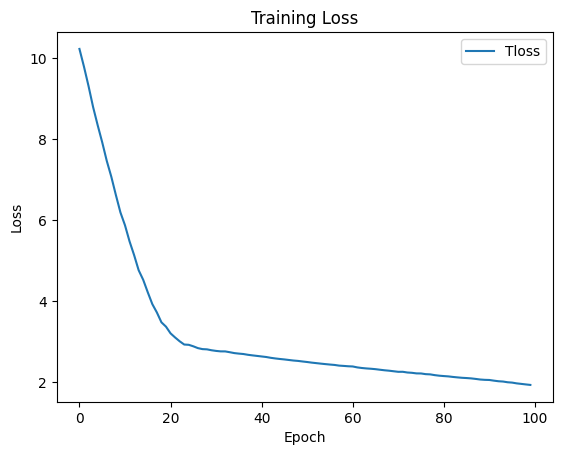

In [72]:
plt.plot(history.history['loss'], label='Tloss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()#可视化训练集损失

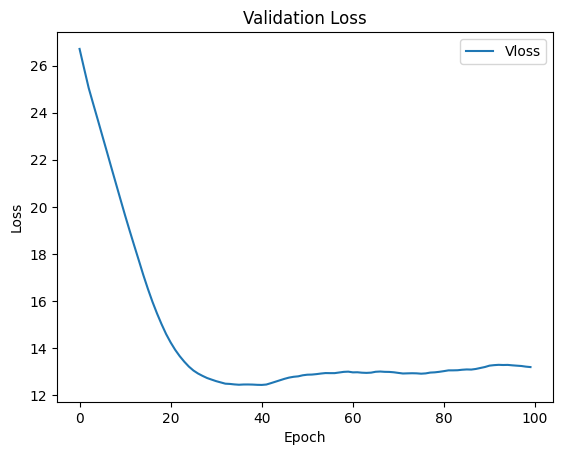

In [73]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label='Vloss')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()#可视化验集损失

In [74]:
test_loss = model.evaluate(x_test, y_test)#模型在验证集的误差

1/1 [==============================] - 0s 0s/step - loss: 1.7413 - mean_absolute_error: 1.0766


In [75]:
print("Test Loss:", test_loss)#打印误差

Test Loss: [1.7413010597229004, 1.076600193977356]


In [76]:
tf.keras.models.save_model(model, 'my_model11.h5')#保存模型

In [77]:
mode2 = tf.keras.models.load_model('my_model11.h5')

In [78]:
from tensorflow import keras

# 加载模型
loaded_model = keras.models.load_model('my_model11.h5')

In [79]:
new_data = pd.read_csv("4预测焊缝增长算列分析.csv")#导入需要预测的数据

In [80]:
new_data1 = new_data .astype('float32')#将数据转为32位

In [81]:
new_data1 = np.array([[1, 2, 3, 4, 5,6,7,8,9,10,11]])

In [82]:
prediction = mode2.predict(new_data)#预测

In [83]:
for pred in prediction:
    print("预测寿命为：", pred[0])#s输出预测值

预测寿命为： 2.9197161
预测寿命为： 7.6524243
预测寿命为： 10.787615
预测寿命为： 4.3384376
预测寿命为： 3.6685603
预测寿命为： 4.6108856
预测寿命为： 6.2323275
预测寿命为： 5.007388
预测寿命为： 4.795565
预测寿命为： 4.838351
预测寿命为： 2.7462487
预测寿命为： 3.2452633
预测寿命为： 4.7123756
预测寿命为： 5.0453568
预测寿命为： 5.83838
预测寿命为： 5.1656146
预测寿命为： 3.2168906
预测寿命为： 4.489382
预测寿命为： 5.4030805
